In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from keras.layers import Dropout

import tensorflow as tf
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [3]:
# re-size all the images to this

IMAGE_SIZE = [224, 224]


train_path = 'datasets/Train'
valid_path = 'datasets/Test'

# add preprocessing layer to the front of VGG
#vgg = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

EfficientNetB4 = tf.keras.applications.EfficientNetB4(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in EfficientNetB4.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(EfficientNetB4.output)
x= Dropout(0.5)(x)


prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=EfficientNetB4.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

Found 1057 images belonging to 4 classes.
Found 49 images belonging to 4 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
106/106 [==============================] - 114s 1s/step - loss: 6.8180 - accuracy: 0.2904 - val_loss: 2.5332 - val_accuracy: 0.3878
Epoch 2/5
106/106 [==============================] - 122s 1s/step - loss: 4.9209 - accuracy: 0.2829 - val_loss: 10.9835 - val_accuracy: 0.2653
Epoch 3/5
106/106 [==============================] - 113s 1s/step - loss: 7.4691 - accuracy: 0.2725 - val_loss: 4.4067 - val_accuracy: 0.3878
Epoch 4/5
106/106 [==============================] - 122s 1s/step - loss: 6.0535 - accuracy: 0.3094 - val_loss: 7.1144 - val_accuracy: 0.2653
Epoch 5/5
106/106 [==============================] - 131s 1s/step - loss: 4.3988 - accuracy: 0.2857 - val_loss: 2.7122 - val_accuracy: 0.1429


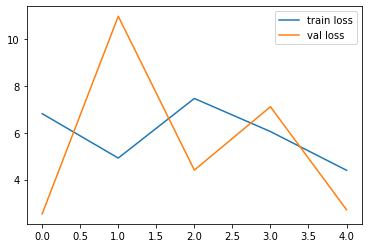

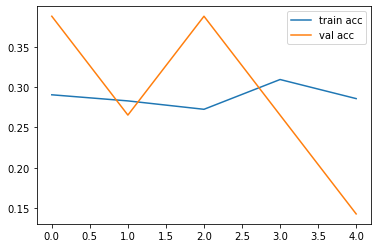

In [4]:
# Decide cost and optimization method 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Use  Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [5]:
from sklearn import metrics
batch_size = 10
target_names = valid_path
Y_pred = model.predict_generator(test_set, 49 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_set.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(test_set.classes, y_pred))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[ 0 10  0  0]
 [ 0  7  0  0]
 [ 0 13  0  0]
 [ 0 19  0  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.14      1.00      0.25         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        19

    accuracy                           0.14        49
   macro avg       0.04      0.25      0.06        49
weighted avg       0.02      0.14      0.04        49



C:\Users\piyush.pathak\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
